In [204]:
!pip install dataframe_image

  Using cached beautifulsoup4-4.10.0-py3-none-any.whl (97 kB)
     |████████████████████████████████| 1.2 MB 2.9 MB/s eta 0:00:01     |██████████████████████▋         | 849 kB 2.9 MB/s eta 0:00:01
  Using cached async_timeout-4.0.1-py3-none-any.whl (5.7 kB)
     |████████████████████████████████| 174 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 203 kB 2.8 MB/s eta 0:00:01
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
     |████████████████████████████████| 304 kB 2.7 MB/s eta 0:00:01
  Using cached soupsieve-2.3.1-py3-none-any.whl (37 kB)


In [205]:
import pandas as pd
import dataframe_image as dfi
import sklearn
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from scipy.sparse import hstack

from sklearn import model_selection
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

import sys
sys.path.append('/mnt/c/Users/cleon/Documents/CAL_CAL/ironhack/Final_project/Redefining_Cancer_treatment/src')
import mlfunctions as mlf

import warnings
warnings.filterwarnings("ignore")

from PIL import Image 
import PIL 

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,8.)})
sns.set_style("whitegrid")


# MACHINE LEARNING

# 1. Reading Data

In [3]:
train = pd.read_csv('../data/trainclean.csv')
test = pd.read_csv('../data/testclean.csv')

In [4]:
train.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)
test.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)

In [209]:
train = train[['ID','Gene','Variation','TEXT','VariationType','Effect','GeneType','Chromosome','Role','TumourType','Class']]

In [210]:
train.head()

,ID,Gene,Variation,TEXT,VariationType,Effect,GeneType,Chromosome,Role,TumourType,Class
0,0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate variety...,unknown,nonsense,Unknown,unknown,Unknown,Unknown,1
1,1,CBL,W802*,abstract background non small cell lung cancer...,Substitution,nonsense,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS",2
2,2,CBL,Q249E,abstract background non small cell lung cancer...,Substitution,missense,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS",2
3,3,CBL,N454D,recent evidence demonstrated acquired uniparen...,Substitution,missense,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS",3
4,4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,Substitution,missense,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS",4


# 2. Split into train, split and cross validation

In [6]:
X = train.drop(columns='Class')
y = train.Class

In [7]:
#Spliting in train and test maintaining the proportion of each class in both datasets--> stratify = y

X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [8]:
#Splitting in train and cross validation
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

# 3. Machine Learning Models

## 3.1. Stacking features

In [9]:
vectorizer = CountVectorizer()

train_Genefeature_onehotCoding = vectorizer.fit_transform(train_df['Gene'])
test_Genefeature_onehotCoding = vectorizer.transform(test_df['Gene'])
cv_Genefeature_onehotCoding = vectorizer.transform(cv_df['Gene'])

vectorizer = CountVectorizer()

train_Variationfeature_onehotCoding = vectorizer.fit_transform(train_df['Variation'])
test_Variationfeature_onehotCoding = vectorizer.transform(test_df['Variation'])
cv_Variationfeature_onehotCoding = vectorizer.transform(cv_df['Variation'])

vectorizer = CountVectorizer()

train_VariationTypefeature_onehotCoding = vectorizer.fit_transform(train_df['VariationType'])
test_VariationTypefeature_onehotCoding = vectorizer.transform(test_df['VariationType'])
cv_VariationTypefeature_onehotCoding = vectorizer.transform(cv_df['VariationType'])

vectorizer = CountVectorizer()

train_Effectfeature_onehotCoding = vectorizer.fit_transform(train_df['Effect'])
test_Effectfeature_onehotCoding = vectorizer.transform(test_df['Effect'])
cv_Effectfeature_onehotCoding = vectorizer.transform(cv_df['Effect'])

vectorizer = CountVectorizer()

train_GeneTypefeature_onehotCoding = vectorizer.fit_transform(train_df['GeneType'])
test_GeneTypefeature_onehotCoding = vectorizer.transform(test_df['GeneType'])
cv_GeneTypefeature_onehotCoding = vectorizer.transform(cv_df['GeneType'])

vectorizer = CountVectorizer()

train_Chromosomefeature_onehotCoding = vectorizer.fit_transform(train_df['Chromosome'])
test_Chromosomefeature_onehotCoding = vectorizer.transform(test_df['Chromosome'])
cv_Chromosomefeature_onehotCoding = vectorizer.transform(cv_df['Chromosome'])

vectorizer = CountVectorizer()

train_Rolefeature_onehotCoding = vectorizer.fit_transform(train_df['Role'])
test_Rolefeature_onehotCoding = vectorizer.transform(test_df['Role'])
cv_Rolefeature_onehotCoding = vectorizer.transform(cv_df['Role'])

vectorizer = CountVectorizer()

train_TumourTypefeature_onehotCoding = vectorizer.fit_transform(train_df['TumourType'])
test_TumourTypefeature_onehotCoding = vectorizer.transform(test_df['TumourType'])
cv_TumourTypefeature_onehotCoding = vectorizer.transform(cv_df['TumourType'])


In [10]:
text_vectorizer = CountVectorizer(min_df = 3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [11]:
type(train_VariationTypefeature_onehotCoding)

scipy.sparse.csr.csr_matrix

In [12]:
train_feat_OHC = hstack((train_Genefeature_onehotCoding,
                        train_Variationfeature_onehotCoding,
                        train_VariationTypefeature_onehotCoding,
                        train_Effectfeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [13]:
test_feat_OHC = hstack((test_Genefeature_onehotCoding,
                        test_Variationfeature_onehotCoding,
                        test_VariationTypefeature_onehotCoding,
                        test_Effectfeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [14]:
cv_feat_OHC = hstack((cv_Genefeature_onehotCoding,
                        cv_Variationfeature_onehotCoding,
                        cv_VariationTypefeature_onehotCoding,
                        cv_Effectfeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [15]:
type(train_feat_OHC)

scipy.sparse.coo.coo_matrix

In [16]:
train_feat_OHC.shape

(2124, 2415)

In [17]:
train_x = hstack((train_feat_OHC,train_text_feature_onehotCoding))
test_x = hstack((test_feat_OHC,test_text_feature_onehotCoding))
cv_x = hstack((cv_feat_OHC,cv_text_feature_onehotCoding))

In [18]:
train_x.shape

(2124, 56458)

In [19]:
test_x.shape

(665, 56458)

In [20]:
cv_x.shape

(532, 56458)

## 3.2. Models

In [21]:
models = ['Multinomial Naive Bayes', 'K-nearest', 'Logistic Regression' 'Random Forest']
train_log_loss =[]
test_log_loss = []
cv_log_loss = []
best_param = []
metrics = []

### 3.2.1. Naive-Bayes

##### 3.2.1.1. Hyper Paramater

In [22]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []

for i in alpha:
    print("For alpha =", i)
    mnb = MultinomialNB(alpha=i)
    mnb.fit(train_x, y_train)
    #To predict the probability of each class to happend, we use CalibratedClassifierCV
    cv_mnb = CalibratedClassifierCV(mnb, method="sigmoid")
    cv_mnb.fit(train_x, y_train)
    cv_mnb_probs = cv_mnb.predict_proba(cv_x)
    cv_log_error_array.append(log_loss(y_cv, cv_mnb_probs))
    # To avoid rounding error while multiplying probabilites, we use log-probability estimates
    print("Log Loss:", round(log_loss(y_cv, cv_mnb_probs),4)) 

For alpha = 1e-05
Log Loss: 1.2193
For alpha = 0.0001
Log Loss: 1.2156
For alpha = 0.001
Log Loss: 1.2239
For alpha = 0.1
Log Loss: 1.2376
For alpha = 1
Log Loss: 1.271
For alpha = 10
Log Loss: 1.3835
For alpha = 100
Log Loss: 1.4183
For alpha = 1000
Log Loss: 1.3906


In [23]:
best_alpha= 0.001
best_param.append(best_alpha)

##### 3.2.1.2. Best Paramater

In [24]:
mnb = MultinomialNB(alpha=best_alpha)
mnb.fit(train_x, y_train)
#To predict the probability of each class to happend, we use CalibratedClassifierCV
cv_mnb = CalibratedClassifierCV(mnb, method="sigmoid")
cv_mnb.fit(train_x, y_train)

cv_mnb_probs = cv_mnb.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_mnb_probs),4))
test_mnb_probs = cv_mnb.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_mnb_probs),4))
train_mnb_probs = cv_mnb.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_mnb_probs),4))

train_log_loss.append(round(log_loss(y_train, train_mnb_probs),4))
test_log_loss.append(round(log_loss(y_test, test_mnb_probs),4))
cv_log_loss .append(round(log_loss(y_cv, cv_mnb_probs),4))

Log Loss for cross_validation: 1.2239
Log Loss for test: 1.2675
Log Loss for train: 0.8117


##### 3.2.1.3. Metrics

In [25]:
type(y_cv)

pandas.core.series.Series

In [26]:
type(cv_x)

scipy.sparse.coo.coo_matrix

In [27]:
type(cv_x.toarray())

numpy.ndarray

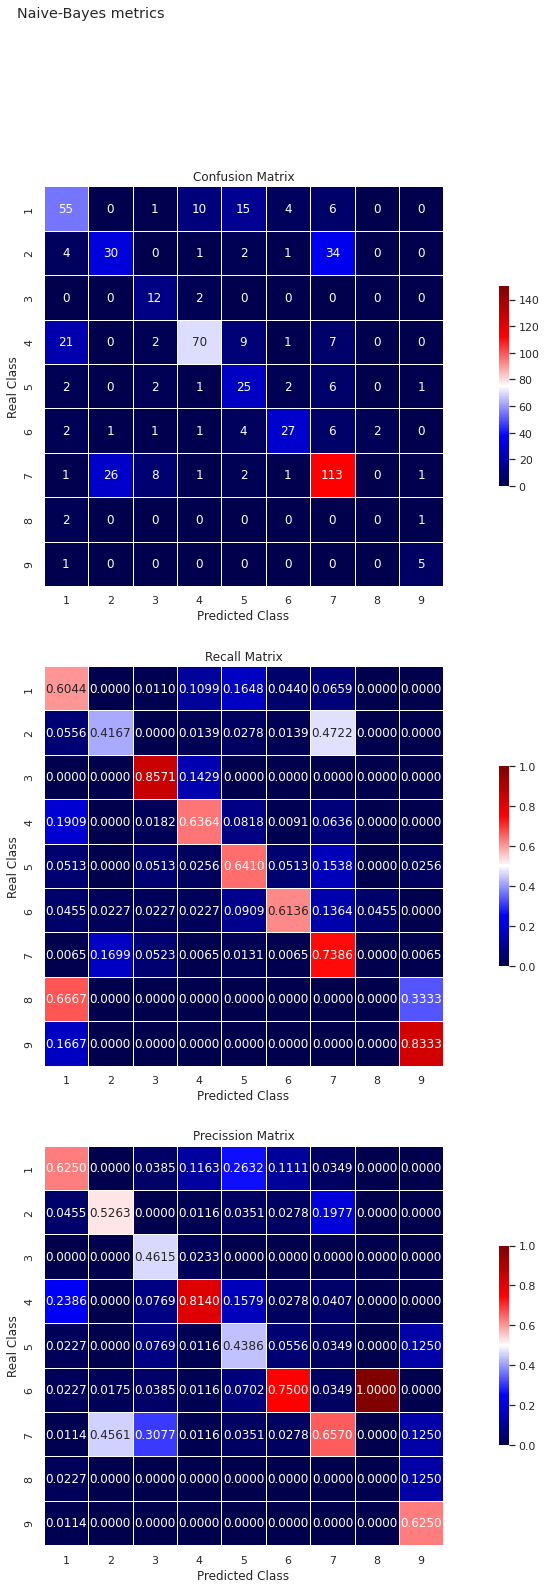

In [28]:
mnb_metrics = mlf.metrics(y_cv, cv_mnb.predict(cv_x.toarray()), 'Naive-Bayes')

In [29]:
metrics.append(mnb_metrics)

In [30]:
pickle.dump(cv_mnb, open("../models/mnb_basic2", 'wb'))

### 3.2.2. K-nearest neighbor

##### 3.2.2.1. Hyper Paramater tuning

In [31]:
alpha = [3,5,7,10,20,40]
cv_log_error_array = []

for i in alpha:
    print("For alpha =", i)
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(train_x, y_train)
    #To predict the probability of each class to happen, we use CalibratedClassifierCV
    cv_kn = CalibratedClassifierCV(kn, method="sigmoid")
    cv_kn.fit(train_x, y_train)
    cv_kn_probs = cv_kn.predict_proba(cv_x)
    cv_log_error_array.append(log_loss(y_cv, cv_kn_probs))
    # To avoid rounding error while multiplying probabilites, we use log-probability estimates
    print("Log Loss:", round(log_loss(y_cv, cv_kn_probs),4)) 

For alpha = 3
Log Loss: 1.1767
For alpha = 5
Log Loss: 1.1477
For alpha = 7
Log Loss: 1.1793
For alpha = 10
Log Loss: 1.2058
For alpha = 20
Log Loss: 1.2719
For alpha = 40
Log Loss: 1.3175


##### 3.2.2.2. Best Parameter

In [32]:
best_alpha=3
best_param.append(best_alpha)

In [38]:
kn = KNeighborsClassifier(n_neighbors=best_alpha)
kn.fit(train_x, y_train)
cv_kn = CalibratedClassifierCV(kn, method="sigmoid")
cv_kn.fit(train_x, y_train)

cv_kn_probs = cv_kn.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_kn_probs),4)) 
test_kn_probs = cv_kn.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_kn_probs),4))
train_kn_probs = cv_kn.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_kn_probs),4))

train_log_loss.append(round(log_loss(y_train, train_kn_probs),4))
test_log_loss.append(round(log_loss(y_test, test_kn_probs),4))
cv_log_loss.append(round(log_loss(y_cv, cv_kn_probs),4))

Log Loss for cross_validation: 1.1767
Log Loss for test: 1.2186
Log Loss for train: 0.7923


##### 3.2.2.3. Metrics


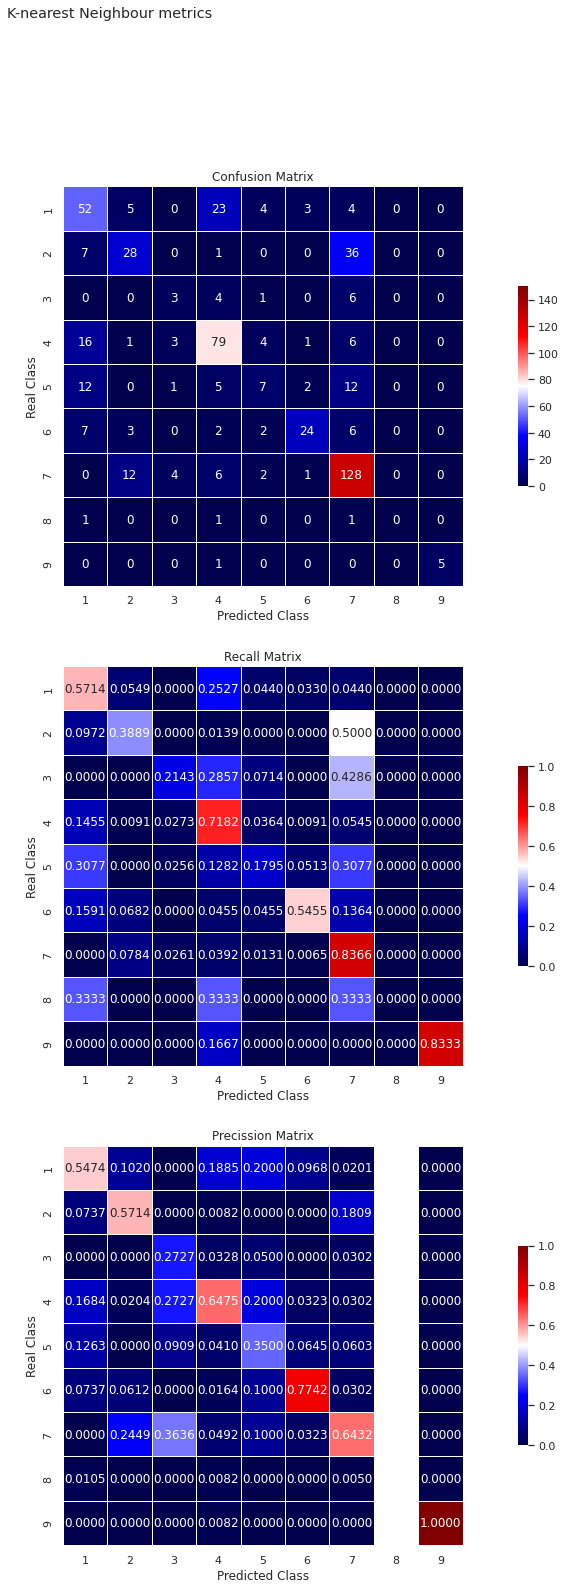

In [39]:
kn_metrics = mlf.metrics(y_cv, cv_kn.predict(cv_x.toarray()), 'K-nearest Neighbour')
metrics.append(mnb_metrics)

In [40]:
pickle.dump(cv_kn, open("../models/kn_basic2", 'wb'))

### 3.2.3. Logistic Regression

In [41]:
alpha = [10**x for x in range(-5,2)]
cv_log_error_array = []

for i in alpha:
    print("For alpha =", i)
    sgd = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    sgd.fit(train_x, y_train)
    #To predict the probability of each class to happen, we use CalibratedClassifierCV
    cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
    cv_sgd.fit(train_x, y_train)
    cv_sgd_probs = cv_sgd.predict_proba(cv_x)
    cv_log_error_array.append(log_loss(y_cv, cv_sgd_probs))
    # To avoid rounding error while multiplying probabilites, we use log-probability estimates
    print("Log Loss:", round(log_loss(y_cv, cv_sgd_probs),4)) 

For alpha = 1e-05
Log Loss: 1.1458
For alpha = 0.0001
Log Loss: 1.05
For alpha = 0.001
Log Loss: 0.9803
For alpha = 0.01
Log Loss: 0.983
For alpha = 0.1
Log Loss: 1.1392
For alpha = 1
Log Loss: 1.4631
For alpha = 10
Log Loss: 1.6146


#### 3.2.3.2. Best parameters

In [42]:
best_alpha=0.001
best_param.append(best_alpha)

In [160]:
sgd = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=42)
sgd.fit(train_x, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

# train_log_loss.append(round(log_loss(y_train, train_sgd_probs),4))
# test_log_loss.append(round(log_loss(y_test, test_sgd_probs),4))
# cv_log_loss .append(round(log_loss(y_cv, cv_sgd_probs),4))

Log Loss for cross_validation: 0.9803
Log Loss for test: 1.0496
Log Loss for train: 0.4841


#### 3.2.3.3. Metrics

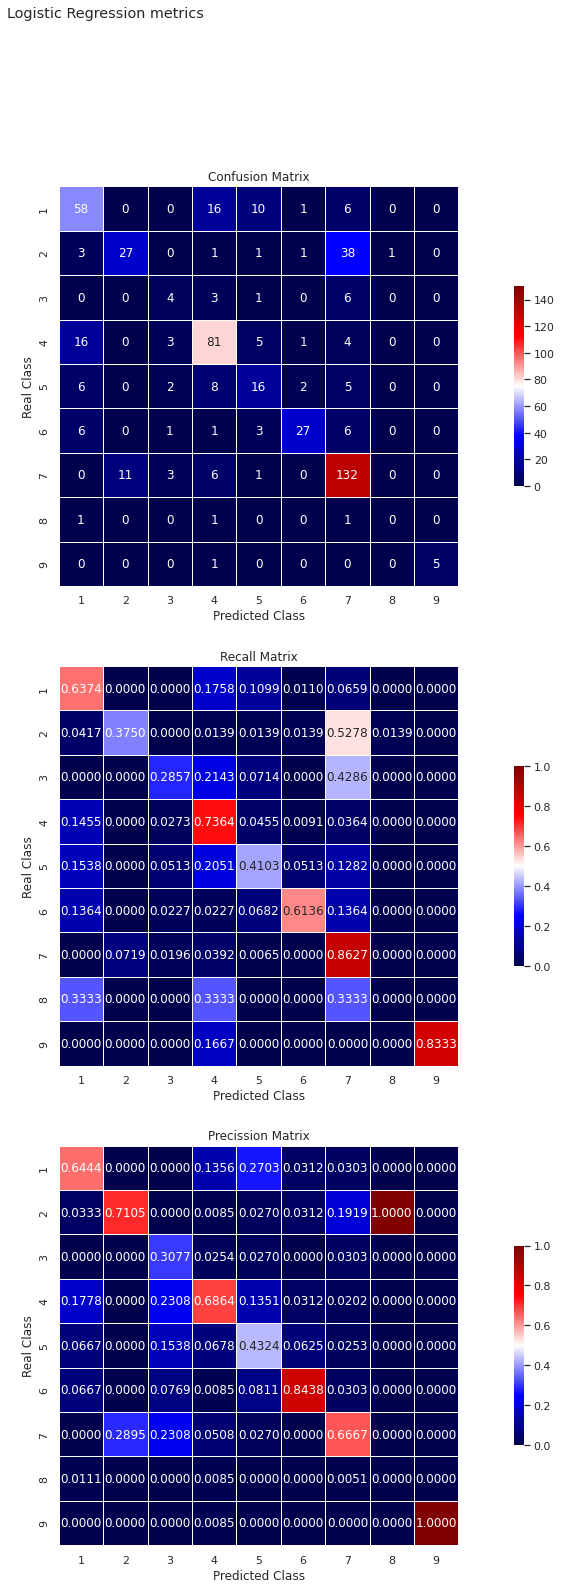

In [44]:
sgd_metrics = mlf.metrics(y_cv, cv_sgd.predict(cv_x.toarray()), 'Logistic Regression')
metrics.append(sgd_metrics)

In [45]:
pickle.dump(cv_sgd, open("../models/sgd_basic2", 'wb'))

### 3.2.4. Random Forest

#### 3.2.4.2. Hyper parameter tunning

In [46]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []

for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        rfc = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        rfc.fit(train_x, y_train)
        cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
        cv_rfc.fit(train_x, y_train)
        cv_rfc_probs = cv_rfc.predict_proba(cv_x)
        cv_log_error_array.append(log_loss(y_cv, cv_rfc_probs))
        print("Log Loss :",log_loss(y_cv, cv_rfc_probs)) 


for n_estimators = 100 and max depth =  5
Log Loss : 1.2028767652597718
for n_estimators = 100 and max depth =  10
Log Loss : 1.1231237852611768
for n_estimators = 200 and max depth =  5
Log Loss : 1.1835230891170758
for n_estimators = 200 and max depth =  10
Log Loss : 1.1132687298934911
for n_estimators = 500 and max depth =  5
Log Loss : 1.179921987273198
for n_estimators = 500 and max depth =  10
Log Loss : 1.1033693371702908
for n_estimators = 1000 and max depth =  5
Log Loss : 1.17694676107717
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0985243058450653
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1746062959834778
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0979374843856244


#### 3.2.4.2. Best parameters

In [47]:
best_alpha=[1000,10]
best_param.append(best_alpha)

In [48]:
rfc = RandomForestClassifier(n_estimators=best_alpha[0], criterion='gini', max_depth=best_alpha[1], random_state=42, n_jobs=-1)
rfc.fit(train_x, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


train_log_loss.append(round(log_loss(y_train, train_rfc_probs),4))
test_log_loss.append(round(log_loss(y_test, test_rfc_probs),4))
cv_log_loss .append(round(log_loss(y_cv, cv_rfc_probs),4))

Log Loss for cross_validation: 1.0985
Log Loss for test: 1.1211
Log Loss for train: 0.6274


#### 3.2.4.3. Metrics

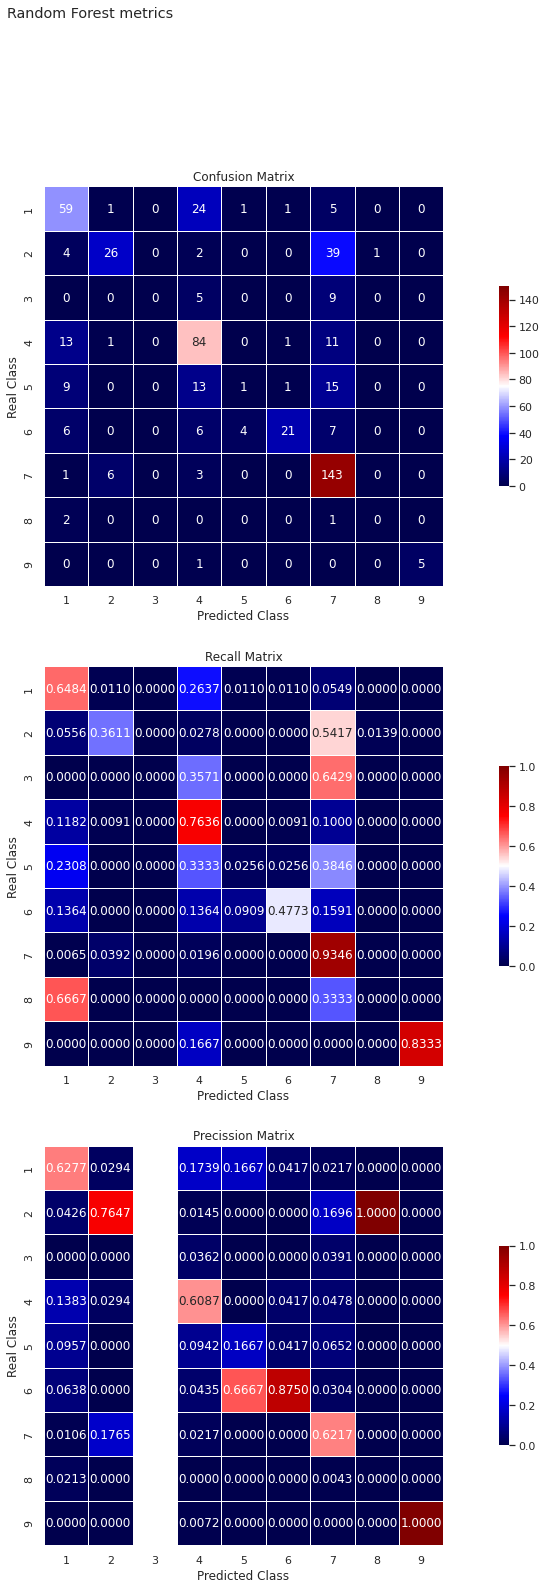

In [49]:
rfc_metrics = mlf.metrics(y_cv, cv_rfc.predict(cv_x.toarray()), 'Random Forest')
metrics.append(rfc_metrics)

In [50]:
pickle.dump(cv_rfc, open("../models/rfc_basic2", 'wb'))

### 3.2.5. Saving models KPI

In [133]:
models = pd.DataFrame(list(zip(train_log_loss, test_log_loss, cv_log_loss, best_param, metrics)))

In [134]:
# models = models.T


In [135]:
models

,0,1,2,3,4
0,0.8117,1.2675,1.2239,0.001,Figure(1440x1800)
1,0.7923,1.2186,1.1767,3,Figure(1440x1800)
2,0.4841,1.0496,0.9803,0.001,Figure(1440x1800)
3,0.6274,1.1211,1.0985,"[1000, 10]",Figure(1440x1800)


In [136]:
models.rename({0:'train_log_loss', 1:'test_log_loss', 2:'cv_log_loss',3: 'best_param', 4:'metrics'},axis=1, inplace=True)

In [137]:
indexx = ['Multinomial Naive Bayes', 'K-nearest', 'Logistic Regression', 'Random Forest']

models.index = indexx

In [138]:
models

,train_log_loss,test_log_loss,cv_log_loss,best_param,metrics
Multinomial Naive Bayes,0.8117,1.2675,1.2239,0.001,Figure(1440x1800)
K-nearest,0.7923,1.2186,1.1767,3,Figure(1440x1800)
Logistic Regression,0.4841,1.0496,0.9803,0.001,Figure(1440x1800)
Random Forest,0.6274,1.1211,1.0985,"[1000, 10]",Figure(1440x1800)


In [142]:
models.to_csv('../data/basicmodelsKPI2.csv',)

In [147]:
metrics[0].savefig('../Images/MNB_metrics.jpg')
metrics[1].savefig('../Images/KN_metrics.jpg')
metrics[2].savefig('../Images/SGD_metrics.jpg')
metrics[3].savefig('../Images/RFC_metrics.jpg')


## 3.2. Feature Optimization

As the difference between cv_log_loss, test_log_loss and train_log_loss shown in the previus Dataframe are quite important, we need to try to optimize model features to minimize overfitting of the models.

For doing so, we are going to use the relation between each feature and the response ('Class') as calculated in 2_EDA Notebook. We will start by importing the csv that contains log_loss for each model made with each of the features.

In [88]:
feature_errors = pd.read_csv('../data/feature_errors.csv')

In [89]:
feature_errors

,Unnamed: 0,0
0,TEXT,1.0648
1,Gene,1.1842
2,TumourType,1.3275
3,Role,1.4920
4,GeneType,1.5905
5,Chromosome,1.6327
6,Variation,1.7168
7,Effect,1.7373
8,VariationType,1.7710


In [90]:
models = pd.read_csv('../data/basicmodelsKPI.csv')

### 3.2.1. Feature Stacking: 5 best features

In [91]:
train_feat_OHC_opt = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [92]:
test_feat_OHC_opt = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [93]:
cv_feat_OHC_opt = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [94]:
train_x_opt = hstack((train_feat_OHC_opt, train_text_feature_onehotCoding))
test_x_opt = hstack((test_feat_OHC_opt, test_text_feature_onehotCoding))
cv_x_opt = hstack((cv_feat_OHC_opt, cv_text_feature_onehotCoding))

#### 3.2.1.1. Logistic Regression

In [114]:
sgd = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_5 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_5 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_5 = round(log_loss(y_train, train_sgd_probs),4)

Log Loss for cross_validation: 1.0189
Log Loss for test: 1.0924
Log Loss for train: 0.5544


#### 3.2.1.2. Randon Forest

In [96]:
# rfc2 = RandomForestClassifier(n_estimators=models['Random Forest'][3][0], criterion='gini', max_depth=models['Random Forest'][3][1], random_state=42, n_jobs=-1)
rfc2 = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
rfc2.fit(train_x_opt, y_train)
cv_rfc2 = CalibratedClassifierCV(rfc2, method="sigmoid")
cv_rfc2.fit(train_x_opt, y_train)

cv_rfc_probs = cv_rfc2.predict_proba(cv_x_opt)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc2.predict_proba(test_x_opt)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc2.predict_proba(train_x_opt)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_5 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_5 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_5 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.1066
Log Loss for test: 1.1298
Log Loss for train: 0.6583


### 3.2.2. Feature Stacking: 6 best features

In [97]:
train_feat_OHC_opt2 = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [98]:
test_feat_OHC_opt2 = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [99]:
cv_feat_OHC_opt2 = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [100]:
train_x_opt2 = hstack((train_feat_OHC_opt2, train_text_feature_onehotCoding))
test_x_opt2 = hstack((test_feat_OHC_opt2, test_text_feature_onehotCoding))
cv_x_opt2 = hstack((cv_feat_OHC_opt2, cv_text_feature_onehotCoding))

#### 3.2.2.1. Logistic Regression

In [115]:
sgd = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt2, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt2, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt2)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt2)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt2)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_6 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_6 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_6 = round(log_loss(y_train, train_sgd_probs),4)

Log Loss for cross_validation: 1.0192
Log Loss for test: 1.0918
Log Loss for train: 0.554


#### 3.2.2.2. Randon Forest

In [103]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
rfc.fit(train_x_opt2, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x_opt2, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x_opt2)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x_opt2)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x_opt2)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_6 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_6 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_6 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.1059
Log Loss for test: 1.1294
Log Loss for train: 0.655


### 3.2.3. Feature Stacking: 7 best features

In [104]:
train_feat_OHC_opt3 = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_Variationfeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [105]:
test_feat_OHC_opt3 = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_Variationfeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [106]:
cv_feat_OHC_opt3 = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_Variationfeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [107]:
train_x_opt3 = hstack((train_feat_OHC_opt3, train_text_feature_onehotCoding))
test_x_opt3 = hstack((test_feat_OHC_opt3, test_text_feature_onehotCoding))
cv_x_opt3 = hstack((cv_feat_OHC_opt3, cv_text_feature_onehotCoding))

#### 3.2.3.1. Logistic Regression

In [116]:
sgd = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt3, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt3, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt3)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt3)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt3)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_7 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_7 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_7 = round(log_loss(y_train, train_sgd_probs),4)

Log Loss for cross_validation: 0.9905
Log Loss for test: 1.0596
Log Loss for train: 0.4886


#### 3.2.3.2. Randon Forest

In [108]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
rfc.fit(train_x_opt3, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x_opt3, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x_opt3)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x_opt3)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x_opt3)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_6 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_6 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_6 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.0992
Log Loss for test: 1.1217
Log Loss for train: 0.6318


### 3.2.4. Feature Stacking: 8 best features

In [109]:
train_feat_OHC_opt4 = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_Effectfeature_onehotCoding,
                        train_Variationfeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [110]:
test_feat_OHC_opt4 = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_Variationfeature_onehotCoding,
                        test_Effectfeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [111]:
cv_feat_OHC_opt4 = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_Variationfeature_onehotCoding,
                        cv_Effectfeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [112]:
train_x_opt4 = hstack((train_feat_OHC_opt4, train_text_feature_onehotCoding))
test_x_opt4 = hstack((test_feat_OHC_opt4, test_text_feature_onehotCoding))
cv_x_opt4 = hstack((cv_feat_OHC_opt4, cv_text_feature_onehotCoding))

#### 3.2.4.1. Logistic Regression

In [117]:
sgd = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt4, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt4, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt4)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt4)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt4)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_8 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_8 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_8 = round(log_loss(y_train, train_sgd_probs),4)

Log Loss for cross_validation: 1.0217
Log Loss for test: 1.0991
Log Loss for train: 0.4838


#### 3.2.4.2. Randon Forest

In [113]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
rfc.fit(train_x_opt4, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x_opt4, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x_opt4)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x_opt4)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x_opt4)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_8 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_8 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_8 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.1029
Log Loss for test: 1.1274
Log Loss for train: 0.6293


In [149]:
train_sgd_probs = cv_sgd.predict_proba(train_x_opt4)

In [152]:
train_sgd_probs[0:5]

array([[0.01957401, 0.08043628, 0.01449255, 0.04808085, 0.01444317,
        0.05182805, 0.76464238, 0.00285771, 0.00364499],
       [0.02480233, 0.83536164, 0.00796363, 0.01669712, 0.02006881,
        0.01444814, 0.07103542, 0.00520306, 0.00441986],
       [0.15387941, 0.02981907, 0.02250607, 0.67433461, 0.04976586,
        0.02813663, 0.02903603, 0.00392688, 0.00859542],
       [0.00798034, 0.06829349, 0.02955203, 0.00309784, 0.11052785,
        0.00820118, 0.76735756, 0.00315977, 0.00182995],
       [0.01383954, 0.62236942, 0.01122469, 0.02788395, 0.02196068,
        0.01745218, 0.27644716, 0.0030741 , 0.00574829]])

In [153]:
type(train_x_opt4)

scipy.sparse.coo.coo_matrix

In [178]:
cv_df.head(1)

,ID,Gene,Variation,VariationType,Effect,TEXT,GeneType,Chromosome,Role,TumourType
881,881,PDGFRA,C456_N468del,Deletion,unknown,introduction pediatric high grade gliomas hgg ...,protein-coding,4,"oncogene, fusion","GIST, idiopathic hypereosinophilic syndrome, p..."


In [158]:
train.head(1)

,ID,Gene,Variation,VariationType,Effect,TEXT,GeneType,Chromosome,Role,TumourType,Class
0,0,FAM58A,Truncating Mutations,unknown,nonsense,cyclin dependent kinases cdks regulate variety...,Unknown,unknown,Unknown,Unknown,1


In [162]:
probas = cv_sgd.predict_proba(cv_x)

In [164]:
probas[0]

array([0.02400379, 0.05782549, 0.00986674, 0.01339662, 0.00810876,
       0.00285476, 0.87307402, 0.00481244, 0.00605737])

In [211]:
classes = ['1. Likely loss-of-function','2. Likely Gain-of-function','3. Neutral','4. Loss-of-function','5. Likely Neutral','6. Inconclusive','7. Gain-of-function','8. Likely Switch-of-function','9. Switch-of-function']

In [195]:
result = dict(zip(classes,probas[0]))

In [196]:
resultdf = pd.DataFrame(result, index=[1])

In [197]:
resultdf

,Likely loss-of-function,Likely Gain-of-function,Neutral,Loss-of-function,Likely Neutral,Inconclusive,Gain-of-function,Likely Switch-of-function,Switch-of-function
1,0.024004,0.057825,0.009867,0.013397,0.008109,0.002855,0.873074,0.004812,0.006057


Text(0.5, 1.0, 'Result for a random sample')

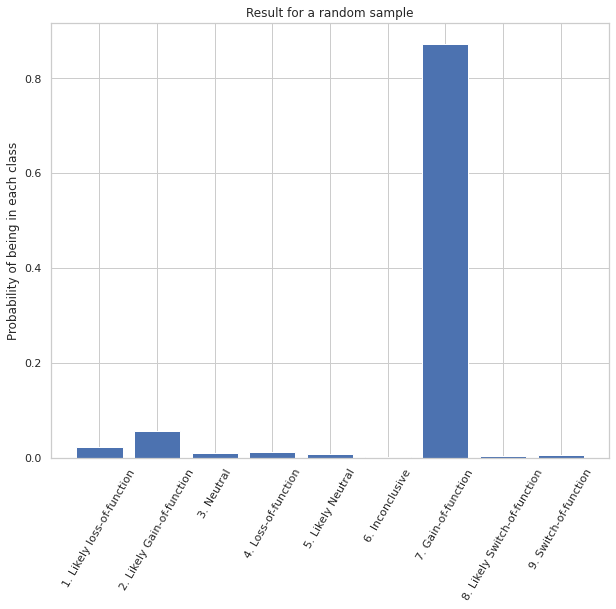

In [216]:
plt.bar(range(len(result)), probas[0], tick_label=classes)
plt.xticks(rotation=60);
plt.ylabel('Probability of being in each class')
plt.title('Result for a random sample')

In [214]:
plt.savefig('../Images/oneresult.jpg')

<Figure size 720x576 with 0 Axes>